In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset
dataset=pd.read_csv('Chd.csv')
print(dataset.describe())
print(dataset.dtypes)
print(dataset.isnull().mean())


              male          age  ...      glucose   TenYearCHD
count  4238.000000  4238.000000  ...  3850.000000  4238.000000
mean      0.429212    49.584946  ...    81.966753     0.151958
std       0.495022     8.572160  ...    23.959998     0.359023
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYe

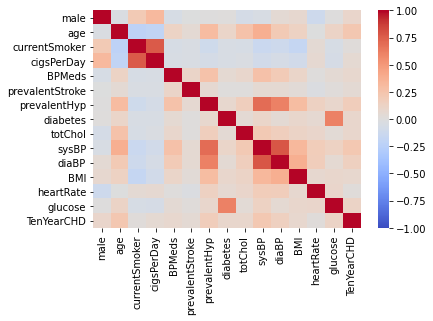

In [537]:
dataset.drop(['education'],axis=1,inplace=True)

dataset.dropna(axis=0,inplace=True)
corr=dataset.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap="coolwarm",xticklabels=dataset.columns,
               yticklabels=dataset.columns)


In [538]:
dataset.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.iloc[:,:-1],
dataset.iloc[:,-1:],test_size=0.25,random_state=5)

In [554]:
from imblearn.combine import SMOTETomek
# Resample the minority class.
sm = SMOTETomek(ratio="auto",random_state=5)
# Fit the model to generate the data.
ovx_tr, ovy_tr = sm.fit_sample(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [583]:
#feature Selection
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(n_jobs=8)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(reg, 
           k_features=8, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='f1',
           cv=5)

sfs1 = sfs1.fit(np.array(ovx_tr), ovy_tr)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    7.5s finished

[2020-04-30 05:15:57] Features: 13/8 -- score: 0.669576481054664[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.9s finished

[2020-04-30 05:16:04] Features: 12/8 -- score: 0.6762296354054861[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.8s finished

[2020-04-30 05:16:09] Features: 11/8 -- score: 0.6855744127924754[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [584]:

selected_feat= list(sfs1.k_feature_idx_)
print(selected_feat)


[0, 1, 2, 4, 5, 6, 7, 8]


In [0]:
#5. TRAINING MODEL
sel_train=ovx_tr[:,[0, 1, 2, 4, 5, 6, 7, 8]]
x_test=np.array(x_test)
sel_test=x_test[:,[0, 1, 2, 4, 5, 6, 7, 8]]
y_train=ovy_tr


In [0]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=1)
X_train=pr.fit_transform(sel_train)
X_test=pr.fit_transform(sel_test)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)


In [607]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(C=0.001,penalty='l2',max_iter=4000)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_trpr=reg.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train Set Accuracy :",accuracy_score(y_train, reg.predict(X_train)))
print("Test Set Accuracy :",accuracy_score(y_test, y_pred))




Train Set Accuracy : 0.6776736259054111
Test Set Accuracy : 0.6119402985074627


_____________TRAIN SET_______________
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2347
           1       0.67      0.69      0.68      2347

    accuracy                           0.68      4694
   macro avg       0.68      0.68      0.68      4694
weighted avg       0.68      0.68      0.68      4694



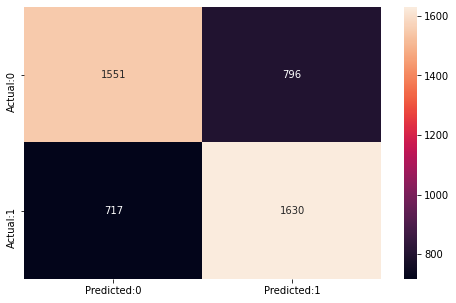

In [608]:
print("_____________TRAIN SET_______________")
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_trpr)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
from sklearn.metrics import classification_report
print(classification_report(y_train,y_trpr))


_________________TEST SET__________________
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       806
           1       0.24      0.80      0.37       132

    accuracy                           0.61       938
   macro avg       0.59      0.69      0.54       938
weighted avg       0.85      0.61      0.67       938



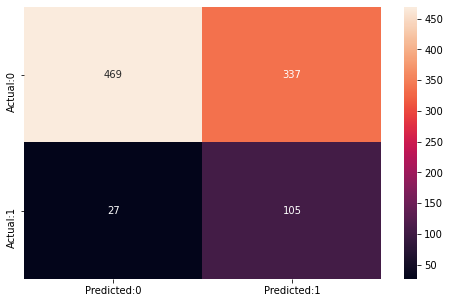

In [610]:
print("_________________TEST SET__________________")
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))